In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from common import *
from PatientVec.Experiments.hyperparam_exps import *

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [3]:
map_model_names = {
    'LR+BOW+norm=l2+Structured' : 'CountBoW',
    'LR+Structured' : 'Structured',
    'LSTM(hs=128)+Structured' : 'LSTM',
    'LSTM(hs=128)+Attention(additive)(hs=128)+Structured' : 'LSTM+Attention'
}

In [13]:
def get_yr_df(data_name) :
    yr_df = []
    for model in ['baselines', 'Basic', 'Attention'] :
        name = os.path.join('outputs/confidence/', data_name, model)
        if os.path.exists(name) :
            dirs = os.listdir(name)
            for d in sorted(dirs) :
                dirname = os.path.join(name, d)
                model_names = get_all_model(dirname)
                for n in model_names :
                    df = json.load(open(os.path.join(n, 'evaluate.json')))
                    vals = {k:v for k, v in df.items()}
                    vals['model'] = map_model_names[d]
                    yr_df.append(vals)
    yr_df = pd.DataFrame(yr_df)
    return yr_df

In [14]:
df_readmission = get_yr_df('Readmission')

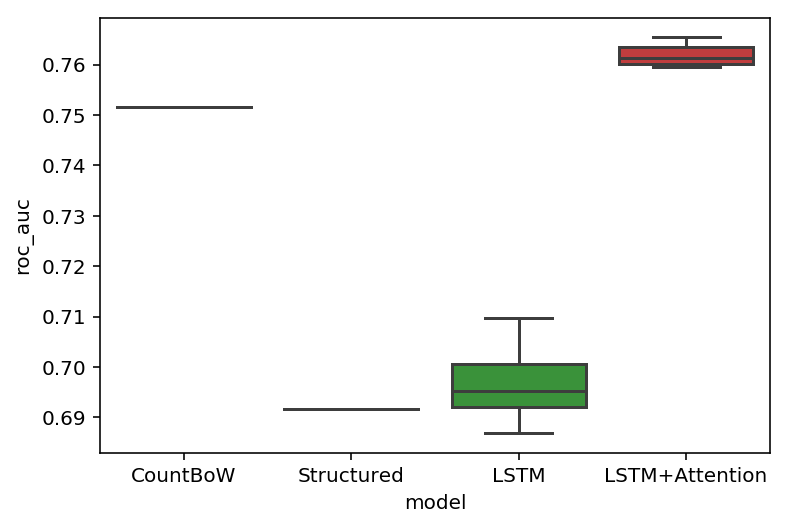

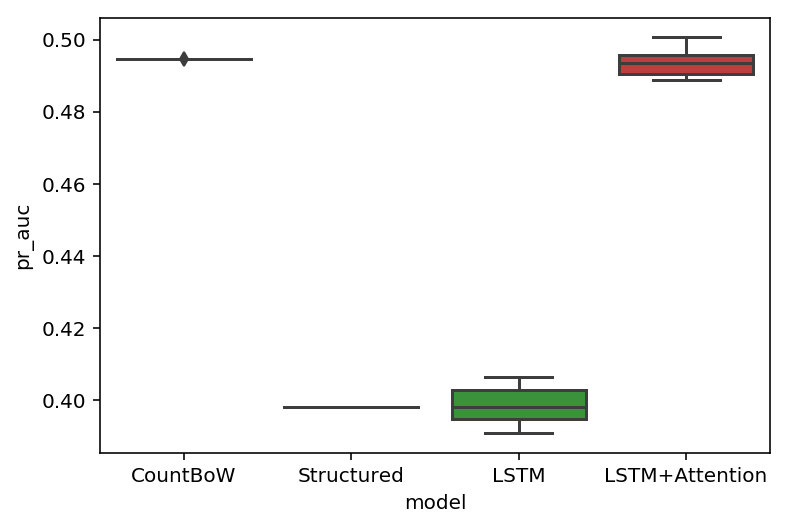

In [42]:
import seaborn as sns
ax = sns.boxplot(x='model', y='roc_auc', data=df_readmission)
# ax.set_ylim(0.5, 0.8)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
ax = sns.boxplot(x='model', y='pr_auc', data=df_readmission)
# ax.set_ylim(0, 1)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

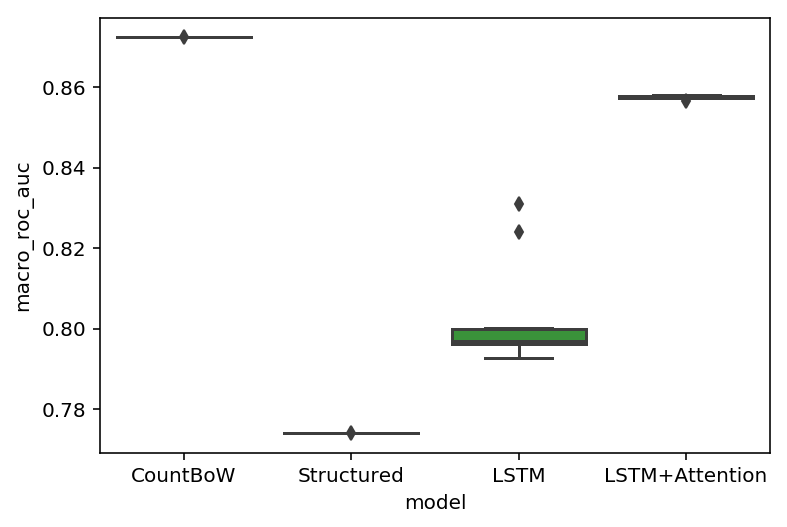

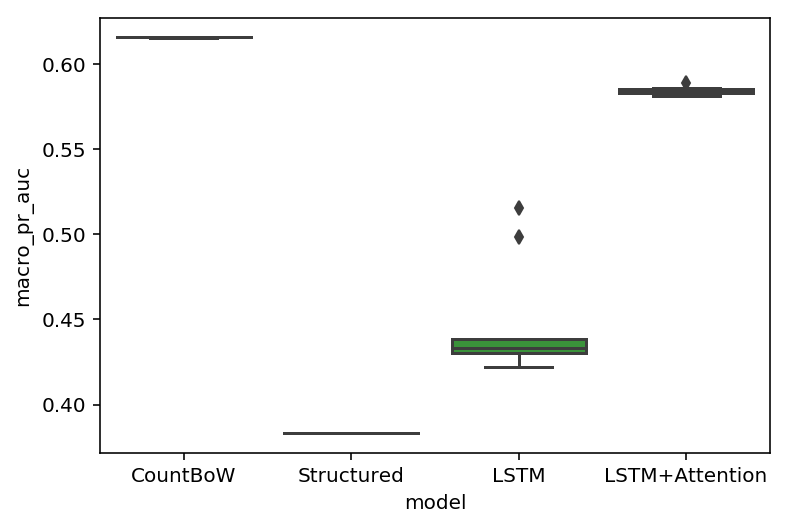

In [35]:
df_diagnosis = get_yr_df('Diagnosis')
import seaborn as sns
ax = sns.boxplot(x='model', y='macro_roc_auc', data=df_diagnosis)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
ax = sns.boxplot(x='model', y='macro_pr_auc', data=df_diagnosis)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)